In [2]:
pip install emoji


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ----------------------------------- ---- 524.3/590.6 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 590.6/590.6 kB 3.0 MB/s eta 0:00:00


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
import emoji
import string

In [3]:
df=pd.read_csv("train (2).csv")
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,tweet,class
0,3,2,0,1,RT @FunSizedYogi: @TheBlackVoice well how else...,0
1,3,0,0,3,Funny thing is....it's not just the people doi...,2
2,3,0,3,0,"RT @winkSOSA: ""@AintShitSweet__: ""@Rakwon_OGOD...",1
3,3,0,3,0,@Jbrendaro30 @ZGabrail @ramsin1995 @GabeEli8 @...,1
4,6,0,6,0,S/o that real bitch,1


In [4]:
df.columns

Index(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'tweet', 'class'],
      dtype='object')

In [5]:
df.shape

(19826, 6)

In [6]:
df.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
tweet                       0
class                       0
dtype: int64

In [7]:
hate_speech=(df['class']==0).sum()
offensive_language=(df['class']==1).sum()
neither=(df['class']==2).sum()
sum=hate_speech+offensive_language+neither
print('hate speech ',(hate_speech/sum)*100,'%')
print('offensive language ',(offensive_language/sum)*100,'%')
print('Neither ',(neither/sum)*100,'%')


hate speech  5.750025219408857 %
offensive language  77.46393624533441 %
Neither  16.786038535256733 %


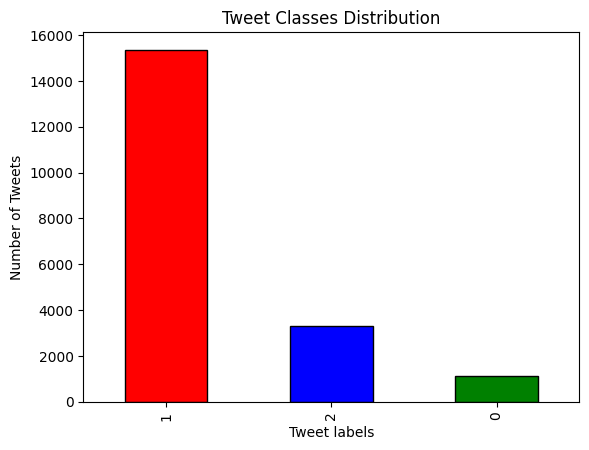

In [8]:
classes=df['class'].value_counts()
colors=['red','blue','green']
classes.plot(kind='bar', color=colors,edgecolor='black')
plt.xlabel('Tweet labels')
plt.ylabel('Number of Tweets')
plt.title('Tweet Classes Distribution')
plt.show()

In [9]:
#remove URLS
#remove punctuation
#remove stop words
#remove emojis

nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

def clean_text(text):
  if not isinstance(text, str):
    return text

  #remove URLS
  text=re.sub(r'http[s]?://\S+', '',text)
  #remove mentions and hashtags
  text=re.sub(r'[@#]\w+', '', text)
  #remove punctuation
  text=text.translate(str.maketrans('','', string.punctuation))
  #remove emojis
  text=emoji.replace_emoji(text, replace='')

  words=text.lower().split()
  text=' '.join([word for word in words if word not in stop_words])

  return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaout\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df['cleaned tweet']=df['tweet'].apply(clean_text)
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,tweet,class,cleaned tweet
0,3,2,0,1,RT @FunSizedYogi: @TheBlackVoice well how else...,0,rt well else white ppl get us forget horrific ...
1,3,0,0,3,Funny thing is....it's not just the people doi...,2,funny thing isits people people seeing pics ju...
2,3,0,3,0,"RT @winkSOSA: ""@AintShitSweet__: ""@Rakwon_OGOD...",1,rt nigga messed wrong bitch
3,3,0,3,0,@Jbrendaro30 @ZGabrail @ramsin1995 @GabeEli8 @...,1,bitch ass nigggaaa
4,6,0,6,0,S/o that real bitch,1,real bitch


In [11]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaout\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaout\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kaout\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def plot_top_words_by_class(df, text_column, class_column, top_n=20):
    class_top_words = {}

    # Iterate over each class
    for label in df[class_column].unique():
        subset = df[df[class_column] == label]  # Filter by class
        words = " ".join(subset[text_column]).split()  # Combine all text & tokenize
        word_freq = Counter(words).most_common(top_n)  # Get top words
        class_top_words[label] = [word for word, _ in word_freq]  # Store words
    
    # Convert to DataFrame
    top_words_df = pd.DataFrame.from_dict(class_top_words, orient='index').transpose()
    top_words_df.columns = [f"Top Words for {col}" for col in top_words_df.columns]

    return top_words_df

# Example Usage
top_words_df = plot_top_words_by_class(df, text_column="cleaned tweet", class_column="class", top_n=20)
print(top_words_df)


   Top Words for 0 Top Words for 2 Top Words for 1
0               rt              rt           bitch
1            bitch           trash              rt
2           faggot            bird         bitches
3             like            like            hoes
4            nigga         charlie            like
5              ass          yellow           pussy
6            white              im             hoe
7             fuck            dont              im
8           nigger             amp            dont
9             dont           birds             ass
10               u             get            fuck
11           trash             lol            shit
12              im             one             get
13         fucking         yankees             got
14          niggas               u            aint
15             fag         colored           nigga
16             get             got               u
17           youre          monkey             lol
18          people          ghe

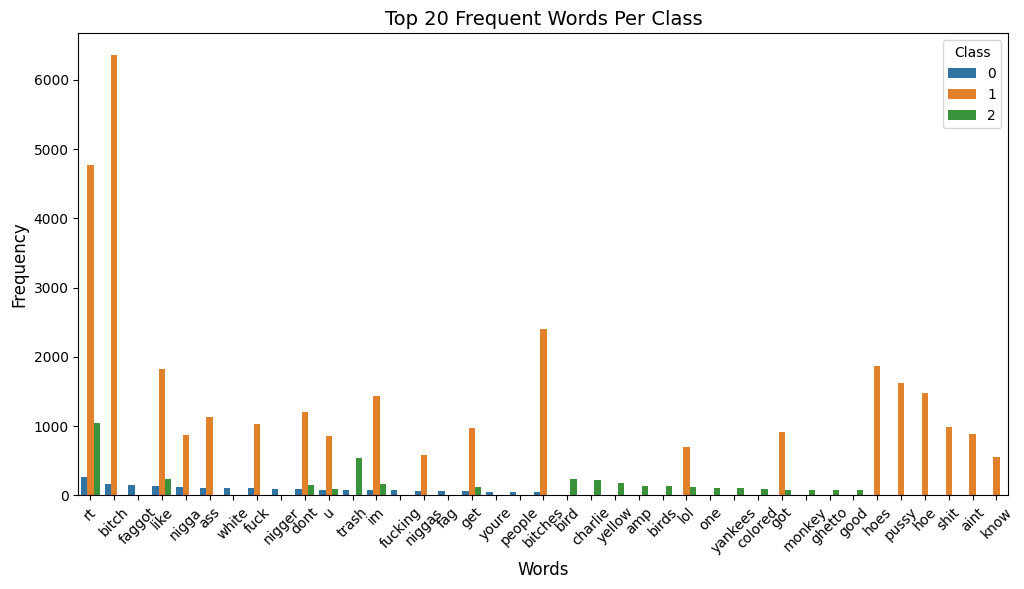

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

def plot_top_words(df, text_column, class_column, top_n=20):
    """
    Plots the most frequent words for each class label using a colorful bar chart.
    """
    class_words_freq = []

    # Iterate over each class and compute word frequencies
    for label in df[class_column].unique():
        subset = df[df[class_column] == label]
        words = " ".join(subset[text_column]).split()
        word_freq = Counter(words).most_common(top_n)

        for word, count in word_freq:
            class_words_freq.append((label, word, count))

    # Convert to DataFrame for Seaborn
    freq_df = pd.DataFrame(class_words_freq, columns=['Class', 'Word', 'Count'])

    # Plot using Seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(data=freq_df, x="Word", y="Count", hue="Class", palette="tab10")

    plt.title(f"Top {top_n} Frequent Words Per Class", fontsize=14)
    plt.xlabel("Words", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title="Class")
    plt.show()

# Example usage
plot_top_words(df, text_column="cleaned tweet", class_column="class", top_n=20)


In [14]:
#stemming removes suffixes to get the root from a word
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
def stemming(text):
  words=text.split()
  return ' '.join([stemmer.stem(word) for word in words])


In [15]:
#lemmatization reduces words to their dictionary base while considering the context
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer=WordNetLemmatizer()
def apply_lemmatization(text):
  words=text.split()
  return ' '.join([lemmatizer.lemmatize(word,pos='v') for word in words])

In [16]:
df['stemmed tweets']=df['cleaned tweet'].apply(stemming)
df['lemmatized tweets']=df['cleaned tweet'].apply(apply_lemmatization)

df.head()

,count,hate_speech_count,offensive_language_count,neither_count,tweet,class,cleaned tweet,stemmed tweets,lemmatized tweets
0,3,2,0,1,RT @FunSizedYogi: @TheBlackVoice well how else...,0,rt well else white ppl get us forget horrific ...,rt well els white ppl get us forget horrif pas...,rt well else white ppl get us forget horrific ...
1,3,0,0,3,Funny thing is....it's not just the people doi...,2,funny thing isits people people seeing pics ju...,funni thing isit peopl peopl see pic judg bird...,funny thing isits people people see pics judge...
2,3,0,3,0,"RT @winkSOSA: ""@AintShitSweet__: ""@Rakwon_OGOD...",1,rt nigga messed wrong bitch,rt nigga mess wrong bitch,rt nigga mess wrong bitch
3,3,0,3,0,@Jbrendaro30 @ZGabrail @ramsin1995 @GabeEli8 @...,1,bitch ass nigggaaa,bitch ass nigggaaa,bitch ass nigggaaa
4,6,0,6,0,S/o that real bitch,1,real bitch,real bitch,real bitch


In [17]:
cleaned_text_length=df['cleaned tweet'].apply(lambda x:len(x.split())).max()
stemmed_text_length=df['stemmed tweets'].apply(lambda x:len(x.split())).max()
lemmatized_text_length=df['lemmatized tweets'].apply(lambda x:len(x.split())).max()

print('cleaned text max words: ',cleaned_text_length)
print('stemmed text max words: ',stemmed_text_length)
print('lemmatized text max words: ',lemmatized_text_length)

cleaned text max words:  25
stemmed text max words:  25
lemmatized text max words:  25


In [18]:
df.columns

Index(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'tweet', 'class', 'cleaned tweet', 'stemmed tweets',
       'lemmatized tweets'],
      dtype='object')

In [19]:
clean_text_tweets=df
stemmed_text_df=df
lemmatized_text_df=df

In [17]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

# Function to get word vectors, ensuring dtype is float32
def get_padded_word_vectors(tokens, model, max_words, vector_size):
    vectors = [model.wv[word] if word in model.wv else np.zeros(vector_size, dtype=np.float32) for word in tokens]
    # Pad with zero vectors if sentence has fewer words than max_words
    while len(vectors) < max_words:
        vectors.append(np.zeros(vector_size, dtype=np.float32))

    return np.array(vectors, dtype=np.float32)

In [21]:
#tokenize words and train word2vec
clean_text_tweets['token'] = clean_text_tweets['cleaned tweet'].apply(lambda x: x.split())
word2vec_model = Word2Vec(sentences=clean_text_tweets['token'], vector_size=100, window=5, min_count=1, workers=4)
max_words = clean_text_tweets['token'].apply(len).max()
vector_size = 100  # Word vector dimension

# Apply function to generate embeddings
clean_text_tweets['embedding'] = clean_text_tweets['token'].apply(lambda x: get_padded_word_vectors(x, word2vec_model, max_words, vector_size))

# Convert embeddings to a NumPy array with correct shape
embedding_array = np.stack(clean_text_tweets['embedding'])  

# Create DataFrame with appropriate column names
embedding_columns = [f'word_{i}_dim_{j}' for i in range(max_words) for j in range(vector_size)]
embedding_df = pd.DataFrame(embedding_array.reshape(embedding_array.shape[0], -1), columns=embedding_columns, dtype=np.float32)

# Concatenate with original DataFrame
cleaned_text_final_df = pd.concat([clean_text_tweets, embedding_df], axis=1).drop(columns=['token', 'embedding'])

print(cleaned_text_final_df.dtypes)  #to check if all columns of word embeddings are float32
print(cleaned_text_final_df.shape)   # Ensure correct dimensions


count                         int64
hate_speech_count             int64
offensive_language_count      int64
neither_count                 int64
tweet                        object
                             ...   
word_24_dim_95              float32
word_24_dim_96              float32
word_24_dim_97              float32
word_24_dim_98              float32
word_24_dim_99              float32
Length: 2509, dtype: object
(19826, 2509)


In [22]:
from gensim.models import Word2Vec
word2vec_model.save("word2vec_cleaned_text.model")

In [23]:
cleaned_text_final_df.columns

Index(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'tweet', 'class', 'cleaned tweet', 'stemmed tweets',
       'lemmatized tweets', 'word_0_dim_0',
       ...
       'word_24_dim_90', 'word_24_dim_91', 'word_24_dim_92', 'word_24_dim_93',
       'word_24_dim_94', 'word_24_dim_95', 'word_24_dim_96', 'word_24_dim_97',
       'word_24_dim_98', 'word_24_dim_99'],
      dtype='object', length=2509)

In [24]:
#word2vec for text with stemming
stemmed_text_df['token'] = stemmed_text_df['stemmed tweets'].apply(lambda x: x.split())
word2vec_model = Word2Vec(sentences=clean_text_tweets['token'], vector_size=100, window=5, min_count=1, workers=4)
max_words = stemmed_text_df['token'].apply(len).max()
vector_size = 100  # Word vector dimension

embedding_array = np.stack(stemmed_text_df['embedding'])  # Shape: (num_sentences, max_words, vector_size)
embedding_columns = [f'word_{i}_dim_{j}' for i in range(max_words) for j in range(vector_size)]
embedding_df = pd.DataFrame(embedding_array.reshape(embedding_array.shape[0], -1), columns=embedding_columns, dtype=np.float32)

stemmed_text_final_df = pd.concat([stemmed_text_df, embedding_df], axis=1).drop(columns=['token', 'embedding'])

In [25]:
#word2vec for text with lemmatization
lemmatized_text_df['token'] = lemmatized_text_df['lemmatized tweets'].apply(lambda x: x.split())
word2vec_model = Word2Vec(sentences=lemmatized_text_df['token'], vector_size=100, window=5, min_count=1, workers=4)
max_words = stemmed_text_df['token'].apply(len).max()
vector_size = 100  

embedding_array = np.stack(lemmatized_text_df['embedding'])  
embedding_columns = [f'word_{i}_dim_{j}' for i in range(max_words) for j in range(vector_size)]
embedding_df = pd.DataFrame(embedding_array.reshape(embedding_array.shape[0], -1), columns=embedding_columns, dtype=np.float32)

lemmatized_text_final_df = pd.concat([lemmatized_text_df, embedding_df], axis=1).drop(columns=['token', 'embedding'])


In [26]:
from gensim.models import Word2Vec
word2vec_model.save("word2vec_lemmatized_text.model")

In [73]:
lemmatized_text_final_df.columns

Index(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'tweet', 'class', 'cleaned tweet', 'stemmed tweets',
       'lemmatized tweets', 'word_0_dim_0',
       ...
       'word_24_dim_90', 'word_24_dim_91', 'word_24_dim_92', 'word_24_dim_93',
       'word_24_dim_94', 'word_24_dim_95', 'word_24_dim_96', 'word_24_dim_97',
       'word_24_dim_98', 'word_24_dim_99'],
      dtype='object', length=2509)

In [74]:
cleaned_text_final_df.drop(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'tweet','stemmed tweets','lemmatized tweets'], axis=1, inplace=True)
stemmed_text_final_df.drop(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'tweet','cleaned tweet','lemmatized tweets'], axis=1, inplace=True)
lemmatized_text_final_df.drop(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'tweet','stemmed tweets','cleaned tweet'], axis=1, inplace=True)

In [75]:
print(cleaned_text_final_df.shape)
print(stemmed_text_final_df.shape)
print(lemmatized_text_final_df.shape)

(19826, 2502)
(19826, 2502)
(19826, 2502)


In [76]:
cleaned_text_final_df.to_csv('cleaned_text_final_df.csv')
stemmed_text_final_df.to_csv('stemmed_text_final_df.csv')
lemmatized_text_final_df.to_csv('lemmatized_text_final_df.csv')

In [ ]:
# word embedding using Glove

In [31]:
import requests
import zipfile

glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "glove.6B.zip"

def download_file(url, save_path, chunk_size=1024):
    response = requests.get(url, stream=True)
    total_size = int(response.headers.get('content-length', 0))
    with open(save_path, 'wb') as file:
        for data in response.iter_content(chunk_size):
            file.write(data)
    
    print("Download complete!")

# Download GloVe embeddings in chunks
print("Downloading GloVe embeddings...")
download_file(glove_url, glove_zip_path)

# Unzip the file
print("Unzipping...")
with zipfile.ZipFile(glove_zip_path, "r") as zip_ref:
    zip_ref.extractall()  # Extracts into the current directory

print("Unzipping complete!")


Download complete!
Unzipping...
Unzipping complete!


In [24]:
clean_text_tweets=df
stemmed_text_df=df
lemmatized_text_df=df

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_glove_embeddings(filepath, word_index, embedding_dim=50):
    embedding_matrix = np.zeros((vocab_size, embedding_dim))  # Initialize with zeros

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:  # Check if word exists in our vocabulary
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

def convert_to_glove_vectors(sequences, embedding_matrix, embedding_dim):
    vectorized_sentences = []
    for seq in sequences:
        sentence_vectors = [embedding_matrix[idx] if idx != 0 else np.zeros(embedding_dim) for idx in seq]
        vectorized_sentences.append(sentence_vectors)
    return np.array(vectorized_sentences)  # Shape: (num_sentences, max_words, embedding_dim)


In [91]:
texts = clean_text_tweets['cleaned tweet'].astype(str).tolist()  # Convert to list of strings
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index  # Dictionary mapping words to unique indices
vocab_size = len(word_index) + 1  # Add 1 for reserved padding index

# Set embedding dimension based on the GloVe file (50, 100, 200, or 300)
embedding_dim = 50  
glove_file_path = "glove.6B.50d.txt"  

# Load GloVe embeddings (assumes the function `load_glove_embeddings` is defined)
embedding_matrix = load_glove_embeddings(glove_file_path, word_index, embedding_dim)

# Tokenize sentences
sequences = tokenizer.texts_to_sequences(texts)
max_words = max(len(seq) for seq in sequences)

# Pad sequences to ensure all sentences are of the same length
padded_sequences = pad_sequences(sequences, maxlen=max_words, padding='post')

# Convert to GloVe word embeddings for each word in the sentences
sentence_embeddings = convert_to_glove_vectors(padded_sequences, embedding_matrix, embedding_dim)

embedding_cols = []
for i in range(max_words):
    for j in range(embedding_dim):
        embedding_cols.append(f'word{i+1}_vec{j}')

reshaped_embeddings = sentence_embeddings.reshape(sentence_embeddings.shape[0], -1)

embedding_df = pd.DataFrame(reshaped_embeddings, columns=embedding_cols)

cleaned_text_final_df = pd.concat([clean_text_tweets, embedding_df], axis=1)

print(cleaned_text_final_df.head())

   count  hate_speech_count  offensive_language_count  neither_count  \
0      3                  2                         0              1   
1      3                  0                         0              3   
2      3                  0                         3              0   
3      3                  0                         3              0   
4      6                  0                         6              0   

                                               tweet  class  \
0  RT @FunSizedYogi: @TheBlackVoice well how else...      0   
1  Funny thing is....it's not just the people doi...      2   
2  RT @winkSOSA: "@AintShitSweet__: "@Rakwon_OGOD...      1   
3  @Jbrendaro30 @ZGabrail @ramsin1995 @GabeEli8 @...      1   
4                                S/o that real bitch      1   

                                       cleaned tweet  \
0  rt well else white ppl get us forget horrific ...   
1  funny thing isits people people seeing pics ju...   
2                   

In [92]:
cleaned_text_final_df.columns

Index(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'tweet', 'class', 'cleaned tweet', 'stemmed tweets',
       'lemmatized tweets', 'token',
       ...
       'word25_vec40', 'word25_vec41', 'word25_vec42', 'word25_vec43',
       'word25_vec44', 'word25_vec45', 'word25_vec46', 'word25_vec47',
       'word25_vec48', 'word25_vec49'],
      dtype='object', length=1261)

In [93]:
#Glove for words with stemming
texts = stemmed_text_df['stemmed tweets'].astype(str).tolist() 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index  
vocab_size = len(word_index) + 1 

embedding_dim = 50  #to modify to either 100, 200,300
glove_file_path = "glove.6B.50d.txt"  
embedding_matrix = load_glove_embeddings(glove_file_path, word_index, embedding_dim)
sequences = tokenizer.texts_to_sequences(texts)
max_words = max(len(seq) for seq in sequences)

padded_sequences = pad_sequences(sequences, maxlen=max_words, padding='post')
sentence_embeddings = convert_to_glove_vectors(padded_sequences, embedding_matrix, embedding_dim)

embedding_cols = []
for i in range(max_words):
    for j in range(embedding_dim):
        embedding_cols.append(f'word{i+1}_vec{j}')

reshaped_embeddings = sentence_embeddings.reshape(sentence_embeddings.shape[0], -1)
embedding_df = pd.DataFrame(reshaped_embeddings, columns=embedding_cols)
stemmed_text_final_df = pd.concat([stemmed_text_df, embedding_df], axis=1)

In [94]:
#Glove for words with lemmatization
texts = lemmatized_text_df['lemmatized tweets'].astype(str).tolist() 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index  
vocab_size = len(word_index) + 1 

embedding_dim = 50  
glove_file_path = "glove.6B.50d.txt"  
embedding_matrix = load_glove_embeddings(glove_file_path, word_index, embedding_dim)
sequences = tokenizer.texts_to_sequences(texts)
max_words = max(len(seq) for seq in sequences)

padded_sequences = pad_sequences(sequences, maxlen=max_words, padding='post')
sentence_embeddings = convert_to_glove_vectors(padded_sequences, embedding_matrix, embedding_dim)

embedding_cols = []
for i in range(max_words):
    for j in range(embedding_dim):
        embedding_cols.append(f'word{i+1}_vec{j}')

reshaped_embeddings = sentence_embeddings.reshape(sentence_embeddings.shape[0], -1)
embedding_df = pd.DataFrame(reshaped_embeddings, columns=embedding_cols)
lemmatized_text_final_df = pd.concat([lemmatized_text_df, embedding_df], axis=1)

In [96]:
cleaned_text_final_df.drop(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'tweet','stemmed tweets','lemmatized tweets'], axis=1, inplace=True)
stemmed_text_final_df.drop(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'tweet','cleaned tweet','lemmatized tweets'], axis=1, inplace=True)
lemmatized_text_final_df.drop(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count', 'tweet','stemmed tweets','cleaned tweet'], axis=1, inplace=True)

In [97]:
cleaned_text_final_df.to_csv('cleaned_text_final_df_glove_50.csv')
stemmed_text_final_df.to_csv('stemmed_text_final_df_glove_50.csv')
lemmatized_text_final_df.to_csv('lemmatized_text_final_df_glove_50.csv')

In [26]:
texts = clean_text_tweets['cleaned tweet'].astype(str).tolist()  # Convert to list of strings
# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index  # Dictionary mapping words to unique indices
vocab_size = len(word_index) + 1  # Add 1 for reserved padding index

# Set embedding dimension based on the GloVe file (50, 100, 200, or 300)
embedding_dim = 200  
glove_file_path = "glove.6B.200d.txt"  

# Load GloVe embeddings (assumes the function `load_glove_embeddings` is defined)
embedding_matrix = load_glove_embeddings(glove_file_path, word_index, embedding_dim)

# Tokenize sentences
sequences = tokenizer.texts_to_sequences(texts)
max_words = max(len(seq) for seq in sequences)

# Pad sequences to ensure all sentences are of the same length
padded_sequences = pad_sequences(sequences, maxlen=max_words, padding='post')

# Convert to GloVe word embeddings for each word in the sentences
sentence_embeddings = convert_to_glove_vectors(padded_sequences, embedding_matrix, embedding_dim)

embedding_cols = []
for i in range(max_words):
    for j in range(embedding_dim):
        embedding_cols.append(f'word{i+1}_vec{j}')

reshaped_embeddings = sentence_embeddings.reshape(sentence_embeddings.shape[0], -1)

embedding_df = pd.DataFrame(reshaped_embeddings, columns=embedding_cols)

cleaned_text_final_df = pd.concat([clean_text_tweets, embedding_df], axis=1)


In [28]:
stemmed_text_final_df.to_csv('stemmed_text_final_df_glove_200.csv')